## **Importing the data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('deliveries.csv')

In [ ]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
df.shape

(260920, 17)

In [ ]:
df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


## **1. Top Batsman by Runs**
• **Task.** Find the top 10 batsman based on the total number of runs score (Hint:- groupby , sort_values(ascendings=False)) ,head(10)

In [ ]:
df.groupby(['batter'])['batsman_runs'].sum().sort_values(ascending=False).head(10)

,batsman_runs
batter,
V Kohli,8014
S Dhawan,6769
RG Sharma,6630
DA Warner,6567
SK Raina,5536
MS Dhoni,5243
AB de Villiers,5181
CH Gayle,4997
RV Uthappa,4954


## **2. Top Bowlers by Wickets**
•  **Task.** ldentify the bowlers who have taken most wickets (Hint:- groupby , sort_values(ascendings=False)) ,head(10)


This analysis helps identify the top wicket-takers, which can provide insights into effective bowling strategies.

In [ ]:
df.groupby(['bowler'])['is_wicket'].sum().sort_values(ascending=False).head(10)

,is_wicket
bowler,
YS Chahal,213
DJ Bravo,207
PP Chawla,201
SP Narine,200
R Ashwin,198
B Kumar,195
SL Malinga,188
A Mishra,183
JJ Bumrah,182


## **3.Run Distribution by Over**
• **TaskAnalyze** how runs are distributed across different overs in a match.

This will help in understanding at which stages Of the match (e.g. powerplay, middle overs, death overs) teams score the most runs.

This can be valuable for strategy planmng.

In [ ]:
teams=df['batting_team'].unique()
for i in range(len(teams)):
  print(f'{i}-{teams[i]}')
batting_team=input("Enter the batsman team name: ")
batting_team=teams[int(batting_team)]
print(f'You choosed:{batting_team}')

0-Kolkata Knight Riders
1-Royal Challengers Bangalore
2-Chennai Super Kings
3-Kings XI Punjab
4-Rajasthan Royals
5-Delhi Daredevils
6-Mumbai Indians
7-Deccan Chargers
8-Kochi Tuskers Kerala
9-Pune Warriors
10-Sunrisers Hyderabad
11-Rising Pune Supergiants
12-Gujarat Lions
13-Rising Pune Supergiant
14-Delhi Capitals
15-Punjab Kings
16-Lucknow Super Giants
17-Gujarat Titans
18-Royal Challengers Bengaluru
Enter the batsman team name: 2
You choosed:Chennai Super Kings


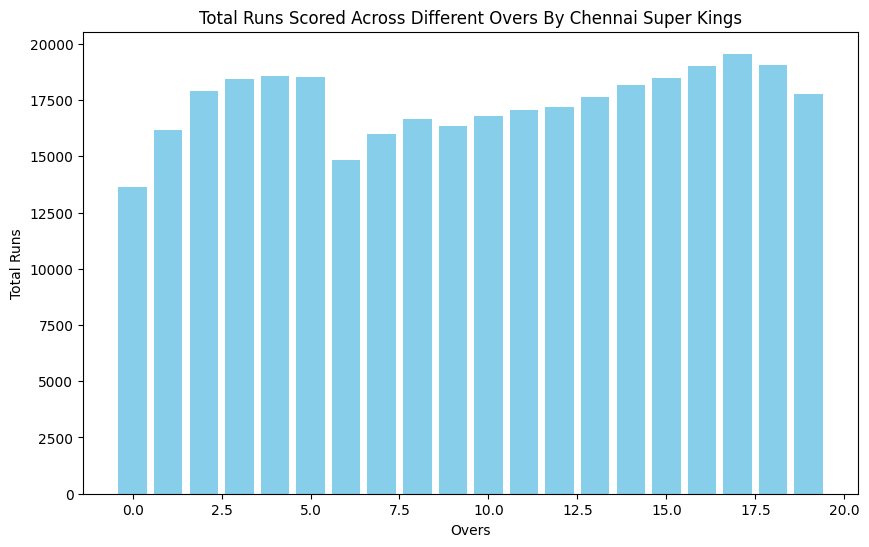

In [ ]:
# Group by 'over' and calculate total runs scored in each over

temp=df[df['batting_team'] == batting_team]
temp = df.groupby(['over'])['total_runs'].sum()
overs = df['over'].unique()
# Sort overs to ensure the correct order
overs_sorted = sorted(overs)

#  distribution of total runs across different overs
plt.figure(figsize=(10, 6))
plt.bar(overs_sorted, temp, color='skyblue')

plt.xlabel('Overs')
plt.ylabel('Total Runs')
plt.title(f'Total Runs Scored Across Different Overs By {batting_team}')
plt.show()


## **4.Extras Breakdown**
• **Task**  Investigate the distribution of extras (wides, no balls, byes, etc.).

 This shows how often different types of extras occur, which can help identify areas where teams lose control (such as bowling wides or no-balls).

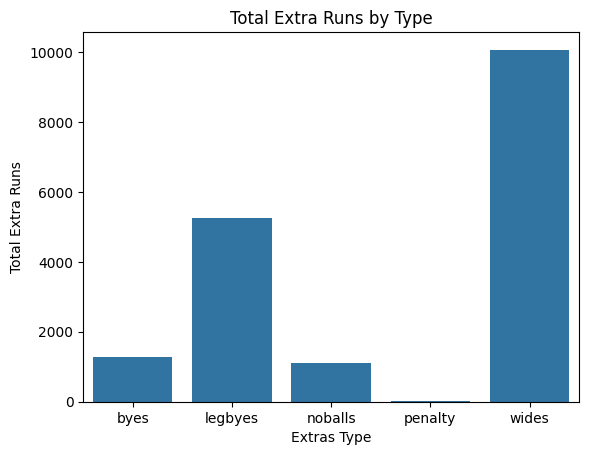

In [ ]:
extras = df.groupby('extras_type')['extra_runs'].sum()
sns.barplot(x=extras.index, y=extras.values)
plt.xlabel('Extras Type')
plt.ylabel('Total Extra Runs')
plt.title('Total Extra Runs by Type')
plt.show()

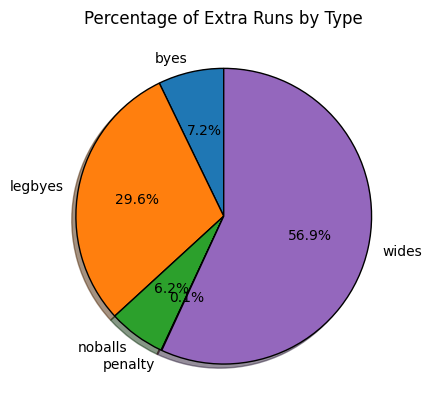

In [ ]:
plt.pie(extras,labels=extras.index,autopct='%1.1f%%',shadow=True,startangle=90,wedgeprops={'edgecolor': 'black'})
plt.title('Percentage of Extra Runs by Type')
plt.show()

## **5.Dismissal Types**
• **Task** Analyze the types of dismissals (e.g., bowled, caught, LBW).

**Insight:** This will highlight the most common ways wickets are taken, providing insights into team strategies and bowling effectiveness.

In [ ]:
df['dismissal_kind'].value_counts()

,count
dismissal_kind,
caught,8063
bowled,2212
run out,1114
lbw,800
caught and bowled,367
stumped,358
retired hurt,15
hit wicket,15
obstructing the field,3


In [ ]:
teams=df['bowling_team'].unique()
for i in range(len(teams)):
  print(f'{i}-{teams[i]}')
bowling_team=input("Enter the bowling team name: ")
bowling_team=teams[int(bowling_team)]
print(f'You choosed:{bowling_team}')

0-Royal Challengers Bangalore
1-Kolkata Knight Riders
2-Kings XI Punjab
3-Chennai Super Kings
4-Delhi Daredevils
5-Rajasthan Royals
6-Mumbai Indians
7-Deccan Chargers
8-Kochi Tuskers Kerala
9-Pune Warriors
10-Sunrisers Hyderabad
11-Rising Pune Supergiants
12-Gujarat Lions
13-Rising Pune Supergiant
14-Delhi Capitals
15-Punjab Kings
16-Gujarat Titans
17-Lucknow Super Giants
18-Royal Challengers Bengaluru
Enter the bowling team name: 2
You choosed:Kings XI Punjab


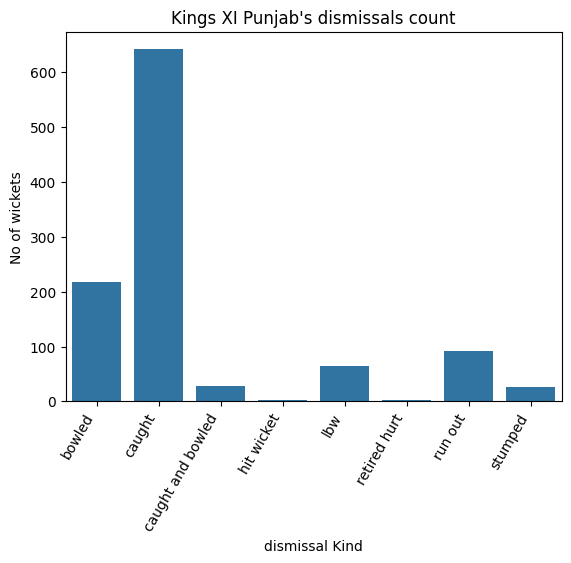

In [ ]:
dismissal = df[df['bowling_team']==bowling_team]
dismissal = dismissal.groupby('dismissal_kind')['dismissal_kind'].count()
sns.barplot(x=dismissal.index, y=dismissal.values)
plt.xlabel('dismissal Kind')
plt.ylabel('No of wickets')
plt.xticks(rotation=60,ha='right')
plt.title(f'{bowling_team}\'s dismissals count')
plt.show()

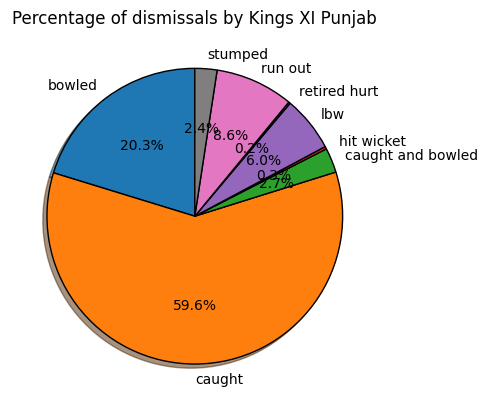

In [ ]:
plt.pie(dismissal,labels=dismissal.index,autopct='%1.1f%%',shadow=True,startangle=90,wedgeprops={'edgecolor': 'black'})
plt.title(f'Percentage of dismissals by {bowling_team}')
plt.show()

8

## **6.Team Performance Comparison Task:**

• Compare the total runs scored by each team.

This will show which teams have been the most successful in scoring runs, helping to compare team performances over time.

In [ ]:
scores=df.groupby(['bowling_team'])['total_runs'].sum()
sorted_scores=scores.sort_values(ascending=False)
sorted_scores

,total_runs
bowling_team,
Mumbai Indians,41296
Kolkata Knight Riders,39086
Royal Challengers Bangalore,37981
Chennai Super Kings,37207
Rajasthan Royals,35142
Kings XI Punjab,30461
Sunrisers Hyderabad,29103
Delhi Daredevils,24730
Delhi Capitals,15395


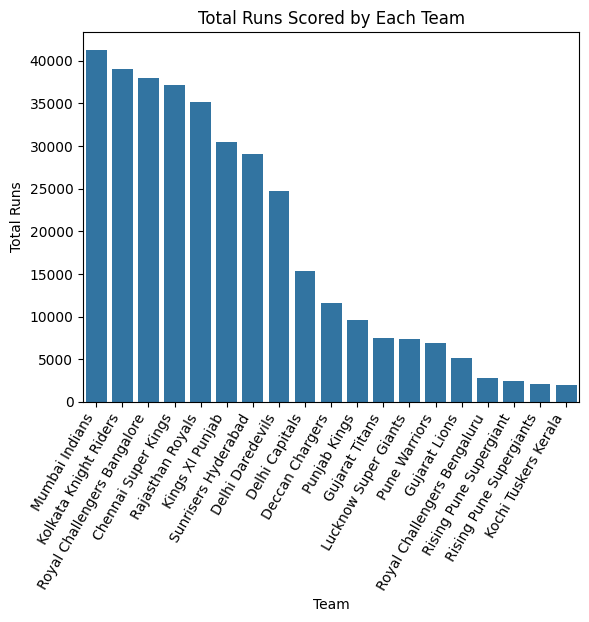

In [ ]:
sns.barplot(x=sorted_scores.index,y=sorted_scores.values)
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=60,ha='right')
plt.title('Total Runs Scored by Each Team')
plt.show()

## **7.Impact of Toss on Match Outcome**

 • **TaskAnalyze** the impact of winning the toss on total runs scored.

  This can show if winning the toss provides any advantage in scoring more runs, offering tactical insights.

In [ ]:
total_runs = df.groupby(['match_id'])['total_runs'].sum()
total_runs

,total_runs
match_id,
335982,304
335983,447
335984,261
335985,331
335986,222
...,...
1426307,429
1426309,323
1426310,346


In [ ]:
mat_df = pd.read_csv('/content/matches.csv')
mat_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
impact = mat_df.groupby(['toss_decision'])['target_runs'].mean()
impact

,target_runs
toss_decision,
bat,160.653846
field,168.478632


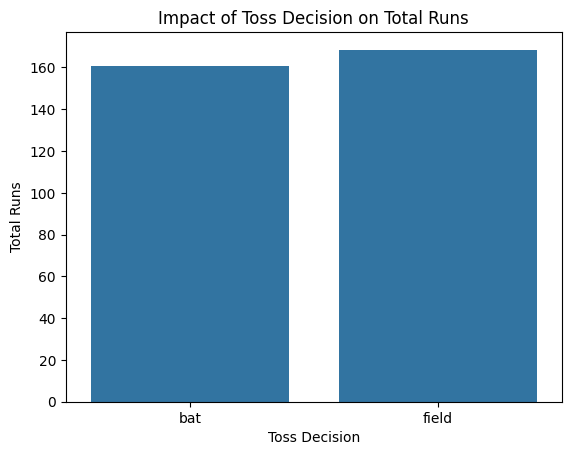

In [ ]:
sns.barplot(x=impact.index,y=impact.values)
plt.xlabel('Toss Decision')
plt.ylabel('Total Runs')
plt.title('Impact of Toss Decision on Total Runs')
plt.show()

In [ ]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


## **1. Average Run Rate per Over**

**Task:**

Calculate the average run rate for each over across all matches.
Create a line plot showing the average runs scored in each over.

**Hint:**

Use the groupby function to group the data by over, and calculate the mean total runs.
Use a line plot (plot(kind='line')) to visualize how the average run rate changes across overs.
**Insight:**

This visualization helps us understand when teams score the most runs during an innings.
A higher run rate towards the end might indicate aggressive batting during the death overs, while a high rate in the first few overs could indicate efficient powerplay use.

In [ ]:
temp_1 = df.groupby(['match_id','over'])['total_runs'].sum()
temp_1

match_id  over
335982    0        7
          1       23
          2        9
          3       27
          4       18
                  ..
1426312   14       0
          15       8
          16      10
          17       5
          18       0
Name: total_runs, Length: 21717, dtype: int64

In [ ]:
temp_2=temp_1.groupby(['over']).mean()
temp_2

,total_runs
over,
0,12.466667
1,14.760731
2,16.342466
3,16.817352
4,16.954338
5,16.936015
6,13.563985
7,14.607861
8,15.223239


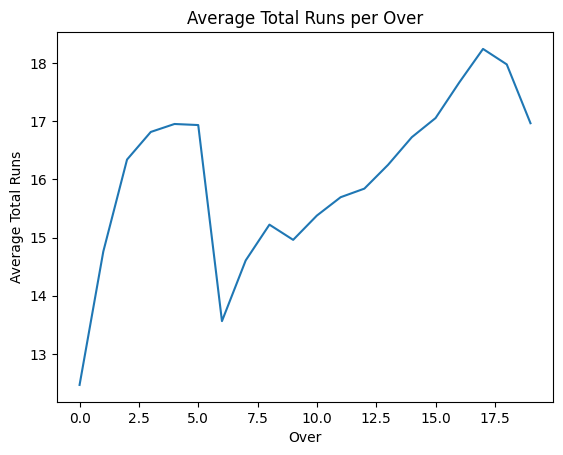

In [ ]:
plt.plot(temp_2)
plt.xlabel('Over')
plt.ylabel('Average Total Runs')
plt.title('Average Total Runs per Over')
plt.show()

## **2. Wicket Fall Distribution by Over**
**Task:**

Analyze which overs tend to see the most wickets fall.
Create a bar plot to visualize the distribution of wickets per over.

**Hint:**

Filter the data for rows where is_wicket == 1 to only count deliveries where a wicket was taken.
Group the data by over and count the number of wickets in each over.

**Insight:**

This helps identify the overs where bowlers are most effective in taking wickets. Teams can use this information to strategize, for instance, by attacking with their best bowlers during the overs where wickets are most likely to fall.

In [ ]:
# Filter the data to include only rows where a wicket was taken
wickets_data = df[df['is_wicket'] == 1]
wickets_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
33,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,5,2,SC Ganguly,Z Khan,BB McCullum,0,0,0,NaN,1,SC Ganguly,caught,JH Kallis
74,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,12,1,RT Ponting,JH Kallis,BB McCullum,0,0,0,NaN,1,RT Ponting,caught,P Kumar
106,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,1,DJ Hussey,AA Noffke,BB McCullum,0,0,0,NaN,1,DJ Hussey,caught,CL White
131,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,I Sharma,W Jaffer,0,0,0,NaN,1,R Dravid,bowled,NaN
138,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,2,V Kohli,AB Dinda,W Jaffer,0,0,0,NaN,1,V Kohli,bowled,NaN


In [ ]:
# Group by over and count the number of wickets per over
wickets_per_over = wickets_data.groupby('over')['is_wicket'].count()
wickets_per_over

,is_wicket
over,
0,463
1,503
2,533
3,548
4,576
5,540
6,444
7,472
8,537


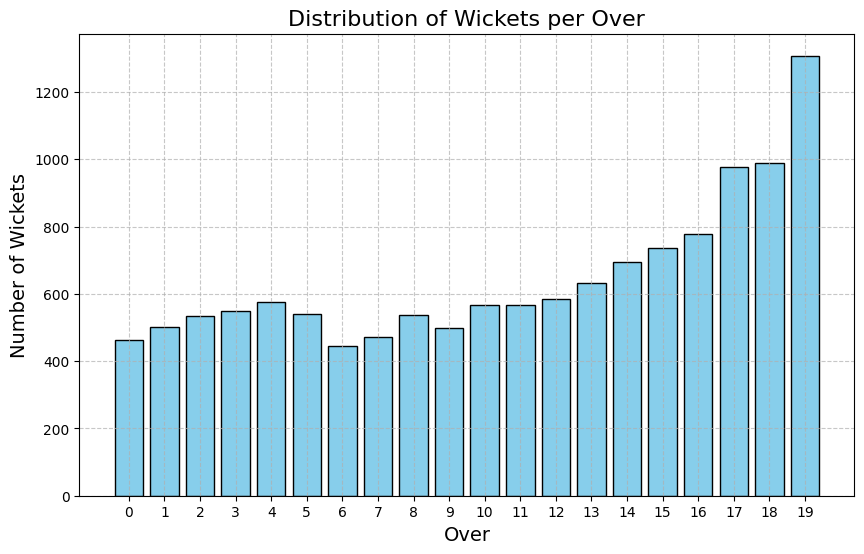

In [ ]:
# Plotting the distribution of wickets per over
plt.figure(figsize=(10,6))
plt.bar(wickets_per_over.index, wickets_per_over.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Wickets per Over', fontsize=16)
plt.xlabel('Over', fontsize=14)
plt.ylabel('Number of Wickets', fontsize=14)
plt.xticks(wickets_per_over.index)  # Ensuring all overs are visible on x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## **3. Partnership Analysis (Top 10 Partnerships by Total Runs)**

**Task:**

Identify the top 10 batting partnerships (batsman and non-striker pairs) that have scored the most runs together.
Create a bar plot showing these partnerships.

**Hint:**

Group the data by both batter and non_striker and sum the total runs.
Use the nlargest function to find the top 10 partnerships by runs scored.

**Insight:**

This visualization reveals the most successful batting partnerships, which can help in understanding which player combinations have the best synergy. Teams can look to these partnerships for inspiration or tactics.

In [ ]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
partnerships = df.groupby(['batter', 'non_striker'])['total_runs'].sum().reset_index()

# Find the top 10 partnerships by total runs scored
top_10_partnerships = partnerships.nlargest(10, 'total_runs')

# Create a new column combining batter and non_striker names for labeling the bar plot
top_10_partnerships['partnership'] = top_10_partnerships['batter'] + ' & ' + top_10_partnerships['non_striker']
top_10_partnerships.head()

,batter,non_striker,total_runs,partnership
324,AB de Villiers,V Kohli,1623,AB de Villiers & V Kohli
1477,CH Gayle,V Kohli,1617,CH Gayle & V Kohli
8499,V Kohli,AB de Villiers,1511,V Kohli & AB de Villiers
1795,DA Warner,S Dhawan,1420,DA Warner & S Dhawan
8509,V Kohli,CH Gayle,1185,V Kohli & CH Gayle


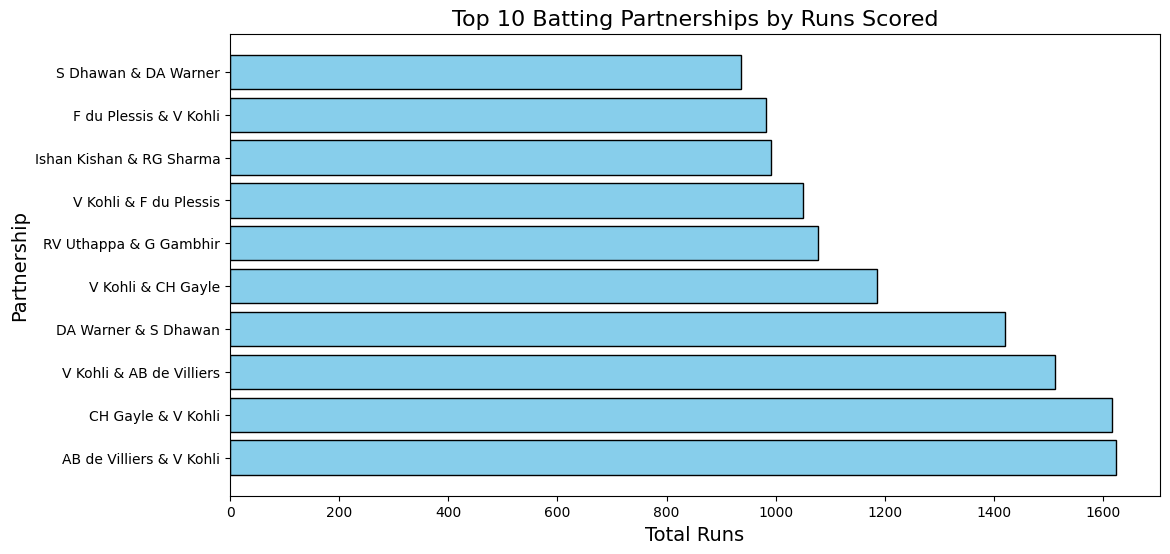

In [ ]:
# Plotting the top 10 batting partnerships
plt.figure(figsize=(12,6))
plt.barh(top_10_partnerships['partnership'], top_10_partnerships['total_runs'], color='skyblue', edgecolor='black')
plt.title('Top 10 Batting Partnerships by Runs Scored', fontsize=16)
plt.xlabel('Total Runs', fontsize=14)
plt.ylabel('Partnership', fontsize=14)
plt.show()

## **4. Batsman vs Bowler Analysis**

**Task:**

Analyze which batsmen have scored the most runs against specific bowlers.
Visualize the top 10 batsman-bowler pairs based on runs scored.

**Hint:**

Group the data by both batter and bowler to aggregate runs scored by each batsman against each bowler.
Use a bar plot to display the top batsman-bowler matchups.

**Insight:**

This helps identify favorable and unfavorable matchups between batsmen and bowlers. For example, if a batsman consistently scores well against a specific bowler, it might inform bowling changes in future matchups.

In [ ]:
batsman_bowler_runs = df.groupby(['batter', 'bowler'])['total_runs'].sum().reset_index()
batsman_bowler_runs = batsman_bowler_runs.nlargest(10, 'total_runs')
batsman_bowler_runs.head()

,batter,bowler,total_runs
5481,DA Warner,SP Narine,204
26199,V Kohli,R Ashwin,192
19809,RG Sharma,UT Yadav,179
22509,SK Raina,PP Chawla,176
26260,V Kohli,UT Yadav,171


In [ ]:
batsman_bowler_runs['batsman_bowler'] = batsman_bowler_runs['batter'] + ' vs ' + batsman_bowler_runs['bowler']
batsman_bowler_runs.head()

,batter,bowler,total_runs,batsman_bowler
5481,DA Warner,SP Narine,204,DA Warner vs SP Narine
26199,V Kohli,R Ashwin,192,V Kohli vs R Ashwin
19809,RG Sharma,UT Yadav,179,RG Sharma vs UT Yadav
22509,SK Raina,PP Chawla,176,SK Raina vs PP Chawla
26260,V Kohli,UT Yadav,171,V Kohli vs UT Yadav


In [ ]:
import plotly.express as px
fig = px.bar(batsman_bowler_runs,
             x='batsman_bowler',
             y='total_runs',
             color='batter',
             title='Top Batsman-Bowler Pairs Based on Runs Scored',
             labels={'batsman_bowler':'Batsman vs Bowler', 'total_runs':'Total Runs'},
             hover_data=['bowler'])
fig.show()

## **5. Wickets by Dismissal Kind per Bowler**

**Task:**

Analyze how different bowlers take wickets (e.g., caught, bowled, LBW).
Create a bar plot that shows the top 10 combinations of bowler and dismissal kind.

**Hint:**

Filter the dataset for deliveries where a wicket was taken.
Group by bowler and dismissal_kind to count the number of wickets taken by each method.

**Insight:**

This plot shows which bowlers excel at certain types of dismissals (e.g., bowled, caught). It provides insights into their bowling style and effectiveness in various dismissal types.

In [ ]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
bowler_and_dismissals = df.groupby(['bowler','dismissal_kind'])['dismissal_kind'].count().sort_values(ascending=False)
bowler_and_dismissals = bowler_and_dismissals
bowler_and_dismissals

,,dismissal_kind
bowler,dismissal_kind,
DJ Bravo,caught,143
YS Chahal,caught,127
B Kumar,caught,122
R Ashwin,caught,117
JJ Bumrah,caught,108
...,...,...
R Ashwin,retired hurt,1
K Khejroliya,bowled,1
B Stanlake,bowled,1


In [ ]:

fig = px.bar(bowler_and_dismissals,
             x='bowler',
             y='dismissal_kind',
             color='dismissal_kind',
             title='Top 10 Bowler-Dismissal Combinations',
             labels={'bowler':'Bowler', 'wicket_count':'Number of Wickets'},
             hover_data=['dismissal_kind'])

# Show the plot
fig.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['dismissal_kind'] but received: bowler